In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [32]:
from google.colab import drive
drive.mount('/content/drive')
file_path='/content/drive/MyDrive/Machine Learning- Session/Course Work Project/metadata.csv' #zainab's
file_path1='/content/drive/MyDrive/Machine Learning- Session/Course Work Project/metadata_test.csv' #zainab's
file_path2='/content/drive/MyDrive/Machine Learning- Session/Course Work Project/metadata_kaggle.csv' #zainab's
df_metadata=pd.read_csv(file_path)
df_metadata_test=pd.read_csv(file_path1)
df_metadata_kaggle=pd.read_csv(file_path2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
file_path3='/content/drive/MyDrive/Machine Learning- Session/Course Work Project/signals.csv' #zainab's
file_path4='/content/drive/MyDrive/Machine Learning- Session/Course Work Project/signals_test.csv' #zainab's
file_path5='/content/drive/MyDrive/Machine Learning- Session/Course Work Project/signals_kaggle.csv' #zainab's
df_signals=pd.read_csv(file_path3)
df_signals_test=pd.read_csv(file_path4)
df_signals_kaggle=pd.read_csv(file_path5)

In [ ]:
df = df_metadata.drop(columns=['user_snippet'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6310 entries, 0 to 6309
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   x-axis__sum_values          6310 non-null   float64
 1   x-axis__median              6310 non-null   float64
 2   x-axis__mean                6310 non-null   float64
 3   x-axis__length              6310 non-null   float64
 4   x-axis__standard_deviation  6310 non-null   float64
 5   x-axis__variance            6310 non-null   float64
 6   x-axis__root_mean_square    6310 non-null   float64
 7   x-axis__maximum             6310 non-null   float64
 8   x-axis__absolute_maximum    6310 non-null   float64
 9   x-axis__minimum             6310 non-null   float64
 10  y-axis__sum_values          6310 non-null   float64
 11  y-axis__median              6310 non-null   float64
 12  y-axis__mean                6310 non-null   float64
 13  y-axis__length              6310 

In [ ]:
correlations = df.corr()['activity'].drop('activity')

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bars
bar_color = ['red' if corr < 0 else 'green' for corr in correlations]
ax.barh(correlations.index, correlations, color=bar_color)

# Adding a vertical line at 0
ax.axvline(x=0, color='black', linestyle='--')

# Adding labels and title
ax.set_xlabel('Correlation')
ax.set_ylabel('Variables')
ax.set_title('Correlation of Variables with Activity')

# Show plot
plt.show()

<ipython-input-5-104ab3f9080d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()['activity'].drop('activity')


KeyError: 'activity'

In [34]:
# Merge df_signals with df_metadata on 'user_snippet'
df_merged = pd.merge(df_signals, df_metadata[['user_snippet', 'activity']], on='user_snippet', how='left')
# Merge df_signals_test
df_merged_test = pd.merge(df_signals_test, df_metadata_test[['user_snippet', 'activity']], on='user_snippet', how='left')
df_merged.head()
df_merged_test.head()

,user_snippet,x-axis,y-axis,z-axis,timestamp,activity
0,3006_0,-8.58,1.65,-2.83,0.0,Walking
1,3006_0,8.81,12.45,5.90,50.0,Walking
2,3006_0,16.40,15.98,1.69,100.0,Walking
3,3006_0,-3.21,9.34,5.79,150.0,Walking
4,3006_0,-4.33,15.89,-7.44,200.0,Walking


In [35]:
df_metadata['user_id'] = df_metadata['user_snippet'].apply(lambda x: x.split('_')[0])
# Grouping and counting occurrences of each activity for each user
activity_counts = df_metadata.groupby(['user_id', 'activity']).size().reset_index(name='count')
activity_counts


,user_id,activity,count
0,525,Downstairs,27
1,525,Jogging,125
2,525,Upstairs,44
3,525,Walking,121
4,537,Downstairs,31
...,...,...,...
109,954,Downstairs,40
110,954,Sitting,15
111,954,Standing,32
112,954,Upstairs,41


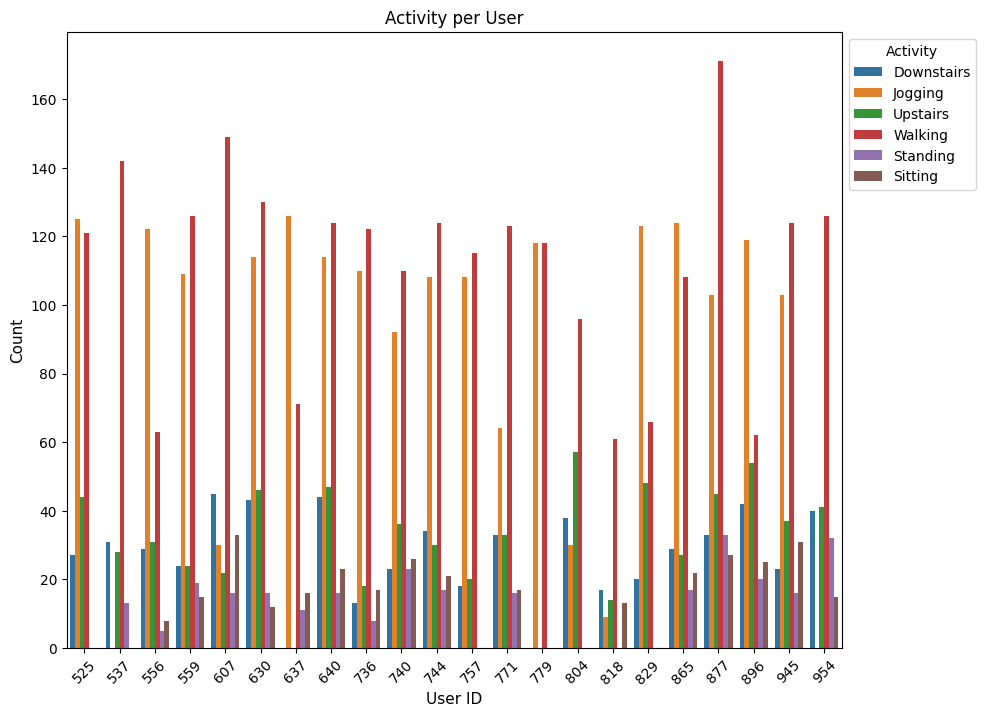

In [ ]:
# Plotting
plt.figure(figsize=(10, 8))
plt.title('Activity per User', fontsize=12)
sns.barplot(x='user_id', y='count', hue='activity', data=activity_counts)
plt.xlabel('User ID', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.legend(title='Activity', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

<ipython-input-7-a2799dab8997>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='activity', y='datapoints', data=activity_data_counts, palette=palette)
<ipython-input-7-a2799dab8997>:7: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.barplot(x='activity', y='datapoints', data=activity_data_counts, palette=palette)


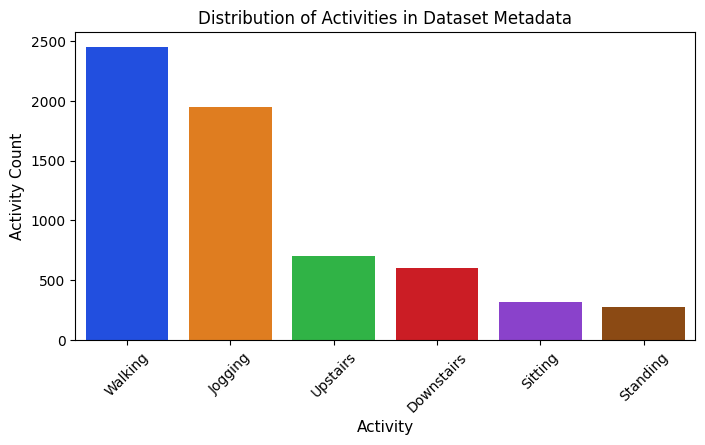

In [ ]:
activity_data_counts = df_metadata['activity'].value_counts().reset_index()
activity_data_counts.columns = ['activity', 'datapoints']
# Plotting
palette = sns.color_palette("bright")
plt.figure(figsize=(8, 4))
plt.title('Distribution of Activities in Dataset Metadata', fontsize=12)
sns.barplot(x='activity', y='datapoints', data=activity_data_counts, palette=palette)
plt.xlabel('Activity', fontsize=11)
plt.ylabel('Activity Count', fontsize=11)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

# Optional: Visualize the chosen palette
#sns.palplot(palette)

plt.show()

<ipython-input-8-c478e5ca22b3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='activity', y='datapoints', data=activity_data_counts, palette=palette)
<ipython-input-8-c478e5ca22b3>:7: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.barplot(x='activity', y='datapoints', data=activity_data_counts, palette=palette)


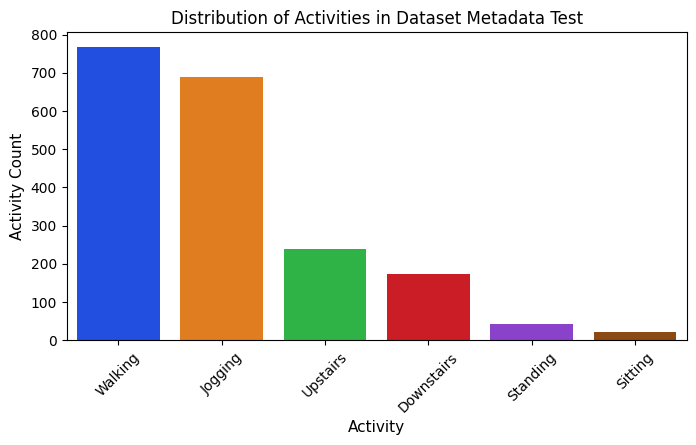

In [ ]:
activity_data_counts = df_metadata_test['activity'].value_counts().reset_index()
activity_data_counts.columns = ['activity', 'datapoints']
# Plotting
palette = sns.color_palette("bright")
plt.figure(figsize=(8, 4))
plt.title('Distribution of Activities in Dataset Metadata Test', fontsize=12)
sns.barplot(x='activity', y='datapoints', data=activity_data_counts, palette=palette)
plt.xlabel('Activity', fontsize=11)
plt.ylabel('Activity Count', fontsize=11)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

# Optional: Visualize the chosen palette
#sns.palplot(palette)

plt.show()

In [ ]:
df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6310 entries, 0 to 6309
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_snippet                6310 non-null   object 
 1   x-axis__sum_values          6310 non-null   float64
 2   x-axis__median              6310 non-null   float64
 3   x-axis__mean                6310 non-null   float64
 4   x-axis__length              6310 non-null   float64
 5   x-axis__standard_deviation  6310 non-null   float64
 6   x-axis__variance            6310 non-null   float64
 7   x-axis__root_mean_square    6310 non-null   float64
 8   x-axis__maximum             6310 non-null   float64
 9   x-axis__absolute_maximum    6310 non-null   float64
 10  x-axis__minimum             6310 non-null   float64
 11  y-axis__sum_values          6310 non-null   float64
 12  y-axis__median              6310 non-null   float64
 13  y-axis__mean                6310 

In [36]:
# Compute acceleration magnitude
df_metadata['acceleration_magnitude'] = np.sqrt(df_metadata['x-axis__mean']**2 +
                                                df_metadata['y-axis__mean']**2 +
                                               df_metadata['z-axis__mean']**2)

sns.set_palette("Set1", desat=0.80)
plt.figure(figsize=(8, 6))
# Plotting
facetgrid = sns.FacetGrid(df_metadata, hue='activity', height=6, aspect=2)
facetgrid.map(sns.kdeplot, 'acceleration_magnitude', shade=True)

# Add annotations
plt.annotate("Stationary Activities", xy=(-0.956, 17), xytext=(-0.9, 23), size=20, va='center', ha='left', \
             arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.1"))
plt.annotate("Moving Activities", xy=(0, 3), xytext=(0.2, 9), size=20, va='center', ha='left', \
             arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.1"))

plt.legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_a

<Figure size 800x600 with 0 Axes>

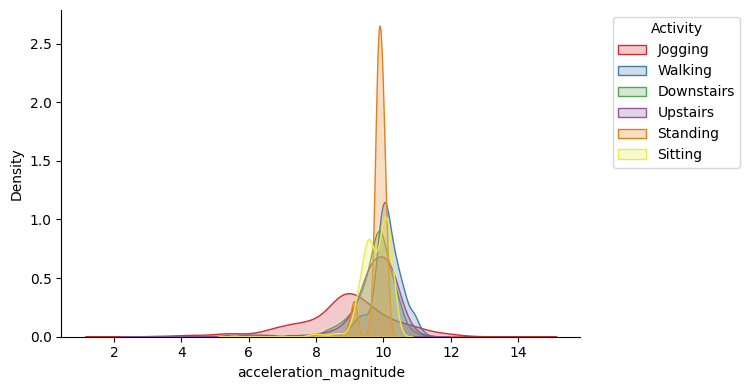

In [ ]:

# Set palette
sns.set_palette("Set1", desat=0.80)

# Create figure with reduced size
plt.figure(figsize=(8, 6))

# Plotting
facetgrid = sns.FacetGrid(df_metadata, hue='activity', height=4, aspect=1.5)  # Adjust the height and aspect ratio
facetgrid.map(sns.kdeplot, 'acceleration_magnitude', shade=True)

# Add annotations
plt.annotate("Stationary Activities", xy=(-0.956, 17), xytext=(-0.9, 23), size=14, va='center', ha='left', \
             arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.1"))
plt.annotate("Moving Activities", xy=(0, 3), xytext=(0.2, 9), size=14, va='center', ha='left', \
             arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.1"))

plt.legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for each activity
df1 = df_metadata[df_metadata['activity'] == 'Standing']
df2 = df_metadata[df_metadata['activity'] == 'Sitting']
df3 = df_metadata[df_metadata['activity'] == 'Walking']
df4 = df_metadata[df_metadata['activity'] == 'Downstairs']
df5 = df_metadata[df_metadata['activity'] == 'Upstairs']
df6 = df_metadata[df_metadata['activity'] == 'Jogging']

plt.figure(figsize=(8, 4))

# Plotting Static Activities
plt.subplot(1, 2, 1)
plt.title("Static Activities (closer view)")
sns.distplot(df1['acceleration_magnitude'], hist=False, label='Standing')
sns.distplot(df2['acceleration_magnitude'], hist=False, label='Sitting')
# Add more sns.distplot() calls for other activities if needed
plt.legend()

# Set x-axis limits based on the range of values for static activities
static_x_min = min(df1['acceleration_magnitude'].min(), df2['acceleration_magnitude'].min())
static_x_max = max(df1['acceleration_magnitude'].max(), df2['acceleration_magnitude'].max())
plt.xlim(static_x_min, static_x_max)

# Plotting Dynamic Activities

plt.subplot(1, 2, 2)
plt.title("Dynamic Activities (closer view)")
sns.distplot(df3['acceleration_magnitude'], hist=False, label='Walking')
sns.distplot(df4['acceleration_magnitude'], hist=False, label='Downstairs')
sns.distplot(df5['acceleration_magnitude'], hist=False, label='Upstairs')
sns.distplot(df6['acceleration_magnitude'], hist=False, label='Jogging')
plt.legend()

plt.tight_layout()  # Adjust subplot parameters to give specified padding.
plt.show()


In [ ]:
print(df_metadata.columns)

Index(['user_snippet', 'x-axis__sum_values', 'x-axis__median', 'x-axis__mean',
       'x-axis__length', 'x-axis__standard_deviation', 'x-axis__variance',
       'x-axis__root_mean_square', 'x-axis__maximum',
       'x-axis__absolute_maximum', 'x-axis__minimum', 'y-axis__sum_values',
       'y-axis__median', 'y-axis__mean', 'y-axis__length',
       'y-axis__standard_deviation', 'y-axis__variance',
       'y-axis__root_mean_square', 'y-axis__maximum',
       'y-axis__absolute_maximum', 'y-axis__minimum', 'z-axis__sum_values',
       'z-axis__median', 'z-axis__mean', 'z-axis__length',
       'z-axis__standard_deviation', 'z-axis__variance',
       'z-axis__root_mean_square', 'z-axis__maximum',
       'z-axis__absolute_maximum', 'z-axis__minimum', 'activity', 'user_id',
       'acceleration_magnitude'],
      dtype='object')


<ipython-input-98-f9442cb4fdc4>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['acceleration_magnitude'], hist=False, label='Standing')
<ipython-input-98-f9442cb4fdc4>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['acceleration_magnitude'], hist=False, label='Sit

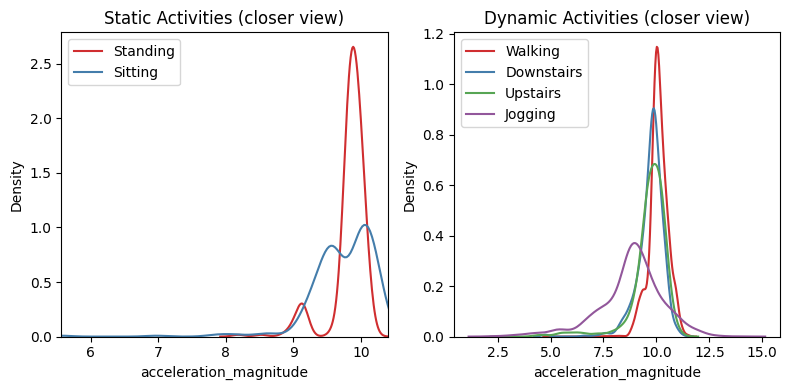

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for each activity
df1 = df_metadata[df_metadata['activity'] == 'Standing']
df2 = df_metadata[df_metadata['activity'] == 'Sitting']
df3 = df_metadata[df_metadata['activity'] == 'Walking']
df4 = df_metadata[df_metadata['activity'] == 'Downstairs']
df5 = df_metadata[df_metadata['activity'] == 'Upstairs']
df6 = df_metadata[df_metadata['activity'] == 'Jogging']

plt.figure(figsize=(8, 4))

# Plotting Static Activities
plt.subplot(1, 2, 1)
plt.title("Static Activities (closer view)")
sns.distplot(df1['acceleration_magnitude'], hist=False, label='Standing')
sns.distplot(df2['acceleration_magnitude'], hist=False, label='Sitting')
# Add more sns.distplot() calls for other activities if needed
plt.legend()

# Set x-axis limits based on the range of values for static activities
static_x_min = min(df1['acceleration_magnitude'].min(), df2['acceleration_magnitude'].min())
static_x_max = max(df1['acceleration_magnitude'].max(), df2['acceleration_magnitude'].max())
plt.xlim(static_x_min, static_x_max)

# Plotting Dynamic Activities

plt.subplot(1, 2, 2)
plt.title("Dynamic Activities (closer view)")
sns.distplot(df3['acceleration_magnitude'], hist=False, label='Walking')
sns.distplot(df4['acceleration_magnitude'], hist=False, label='Downstairs')
sns.distplot(df5['acceleration_magnitude'], hist=False, label='Upstairs')
sns.distplot(df6['acceleration_magnitude'], hist=False, label='Jogging')
plt.legend()

plt.tight_layout()  # Adjust subplot parameters to give specified padding.
plt.show()


In [37]:
# Extract the features and target variable
X = df_metadata.drop(columns=['activity', 'user_snippet'])  # Features (excluding 'activity' and 'user_snippet')
y = df_metadata['activity']

In [38]:
!pip install umap-learn

In [39]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neural_network import MLPRegressor
#import umap

from sklearn.preprocessing import StandardScaler

In [40]:
# scale the data
scaler = StandardScaler()
from sklearn.preprocessing import LabelEncoder

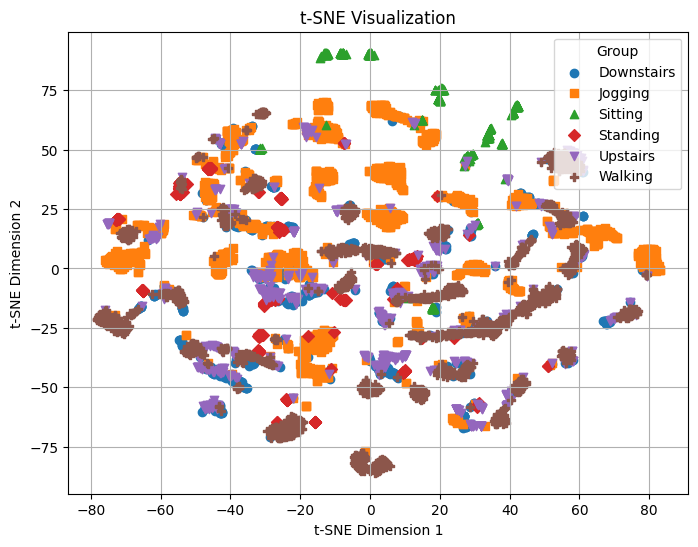

In [41]:
# Encode categorical labels into numerical format
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Get unique numerical labels
unique_labels = np.unique(y_encoded)

# Decode labels for legend
decoded_labels = label_encoder.inverse_transform(unique_labels)

# Define shapes for each group
shapes = ['o', 's', '^', 'D', 'v', 'P']

# Plot t-SNE embeddings with different shapes and colors for each group
plt.figure(figsize=(8, 6))
for i, label in enumerate(unique_labels):
    X_label = X_tsne[y_encoded == label]
    plt.scatter(X_label[:, 0], X_label[:, 1], label=decoded_labels[i], marker=shapes[i % len(shapes)])

plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Group', loc='upper right')
plt.grid(True)
plt.show()

ValueError: num must be an integer with 1 <= num <= 4, not 5

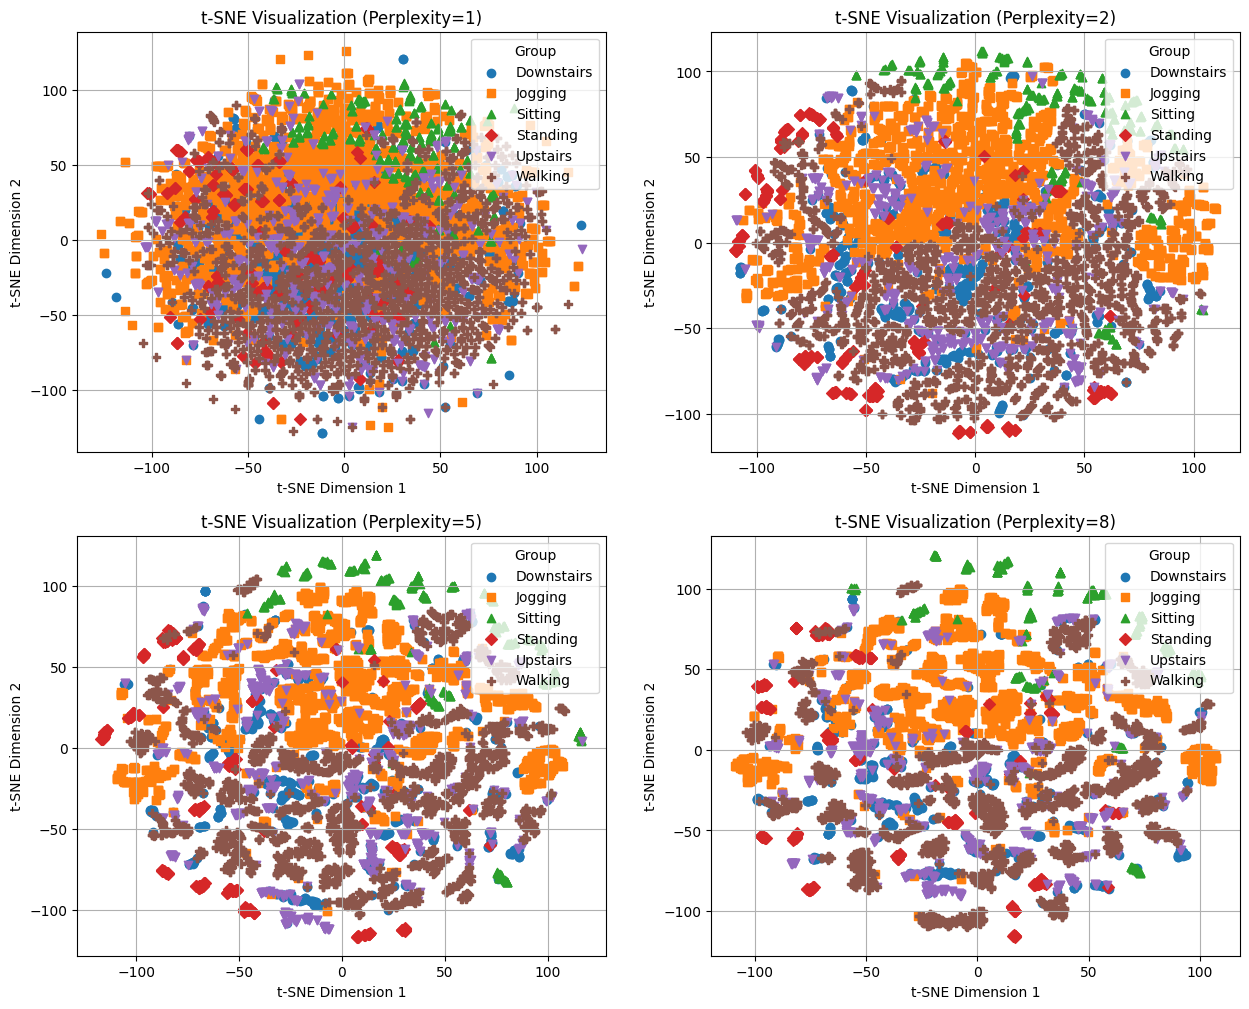

In [44]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Encode categorical labels into numerical format
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Perform t-SNE with different perplexity values
perplexities = [1, 2,5, 8, 12]  # You can adjust this list based on your needs

plt.figure(figsize=(15, 12))

for i, perplexity in enumerate(perplexities):
    # Perform t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X)

    # Get unique numerical labels
    unique_labels = np.unique(y_encoded)

    # Decode labels for legend
    decoded_labels = label_encoder.inverse_transform(unique_labels)

    # Define shapes for each group
    shapes = ['o', 's', '^', 'D', 'v', 'P']

    plt.subplot(2, 2, i + 1)

    # Plot t-SNE embeddings with different shapes and colors for each group
    for j, label in enumerate(unique_labels):
        X_label = X_tsne[y_encoded == label]
        plt.scatter(X_label[:, 0], X_label[:, 1], label=decoded_labels[j], marker=shapes[j % len(shapes)])

    plt.title(f't-SNE Visualization (Perplexity={perplexity})')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.legend(title='Group', loc='upper right')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [46]:
from sklearn.preprocessing import LabelEncoder

# Encode activity column
label_encoder = LabelEncoder()
df_metadata['activity_encoded'] = label_encoder.fit_transform(df_metadata['activity'])

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# Separate numerical columns for PCA
numerical_columns = df_metadata.select_dtypes(include=['float64'])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_columns)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Create DataFrame for principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenate with activity_encoded for plotting
pc_df = pd.concat([pc_df, df_metadata['activity_encoded']], axis=1)



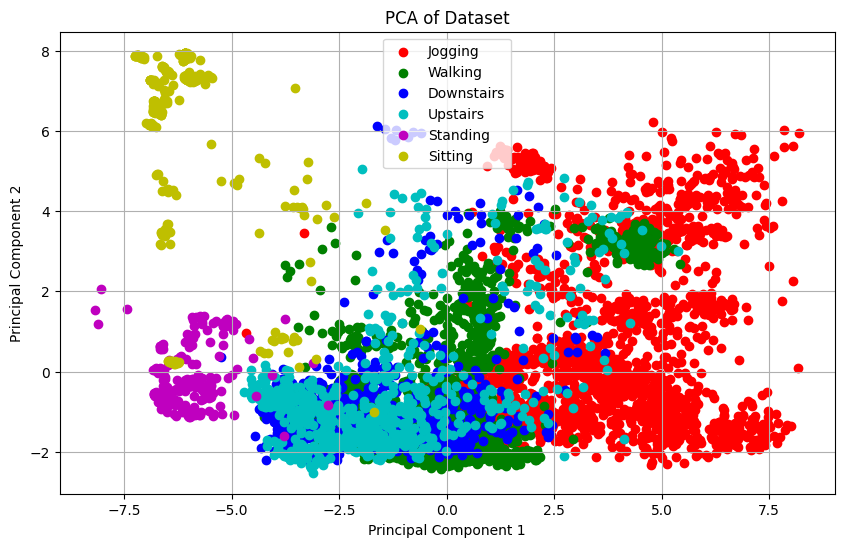

Principal Components:
[[-0.01243827 -0.00779017 -0.0123677   0.02424269  0.27422833  0.24384168
   0.2073189   0.18727854  0.24325181 -0.2092388  -0.07897686 -0.06920446
  -0.0806006   0.02424269  0.27043213  0.25188241  0.11234832  0.13491491
   0.18207071 -0.25209085 -0.15236003 -0.14843439 -0.15254866  0.02424269
   0.27307491  0.24384855  0.18916957  0.18630475  0.23699981 -0.26714014]
 [ 0.10802515  0.1158904   0.10782678 -0.01667986  0.04053265  0.09123446
   0.21520982  0.04379625  0.07869793  0.08144054 -0.39248286 -0.38798644
  -0.39236245 -0.01667986 -0.06154413 -0.00605345 -0.33728727 -0.34214826
  -0.28098394 -0.15064952  0.13991767  0.15032829  0.14006913 -0.01667986
  -0.03532616  0.01240467  0.17159894 -0.01668157  0.00361837  0.06045017]]

Explained Variance Ratio:
[0.37633082 0.17146489]


In [13]:
# Plot the first two principal components
plt.figure(figsize=(10, 6))
targets = df_metadata['activity'].unique()
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k'][:len(targets)]
for target, color in zip(targets, colors):
    indices_to_keep = pc_df['activity_encoded'] == label_encoder.transform([target])[0]
    plt.scatter(pc_df.loc[indices_to_keep, 'PC1'], pc_df.loc[indices_to_keep, 'PC2'], c=color, label=target)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.legend()
plt.grid()
plt.show()

# Summary of PCA
print("Principal Components:")
print(pca.components_)
print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

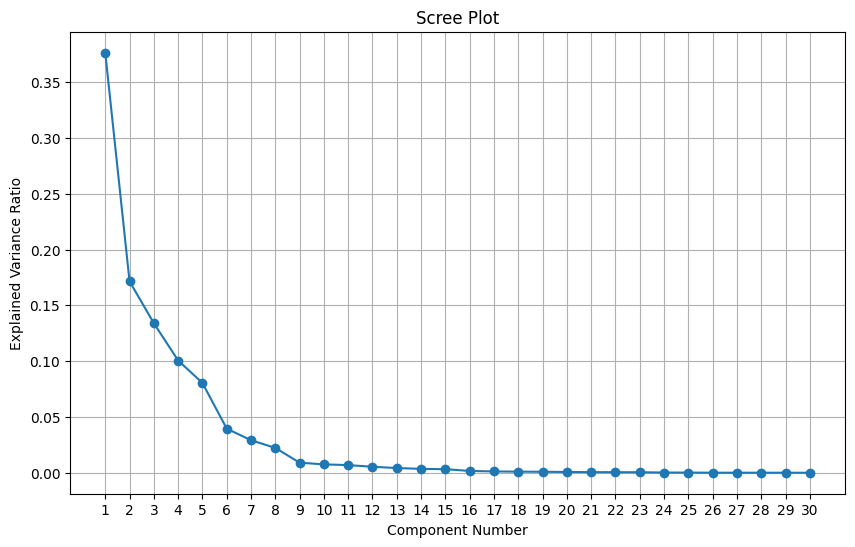

In [14]:
pca = PCA()
pca.fit(scaled_features)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot scree plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.xticks(np.arange(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

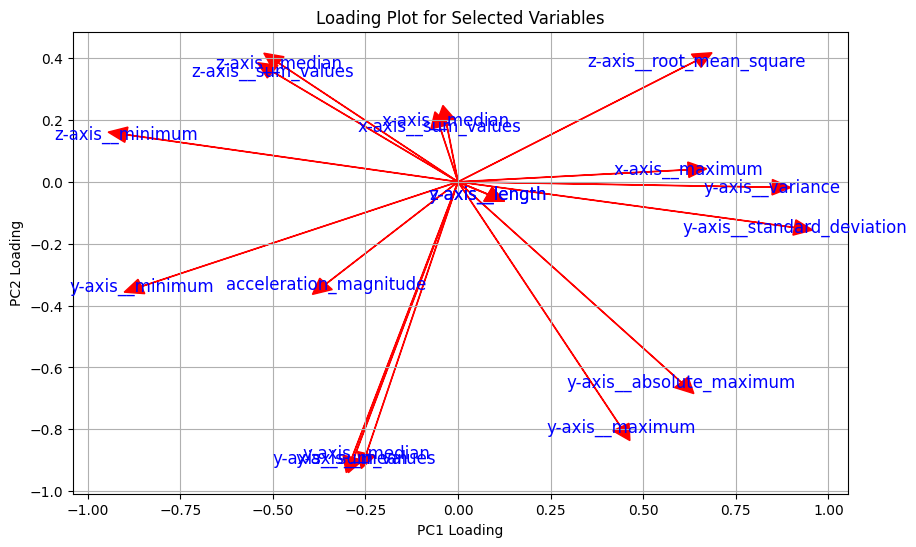

In [ ]:
# Get the loadings (eigenvectors) of each original feature on the principal components
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Index numbers of variables to plot
variables_to_plot = [0, 1, 7, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 23, 26, 29, 30]

# Plot loading plot for selected variables
plt.figure(figsize=(10, 6))
for i in variables_to_plot:
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], head_width=0.05, head_length=0.05, color='r')
    plt.text(loadings[i, 0], loadings[i, 1], numerical_columns.columns[i], color='b', fontsize=12, ha='center', va='center')

plt.xlabel('PC1 Loading')
plt.ylabel('PC2 Loading')
plt.title('Loading Plot for Selected Variables')
plt.grid(True)
plt.show()


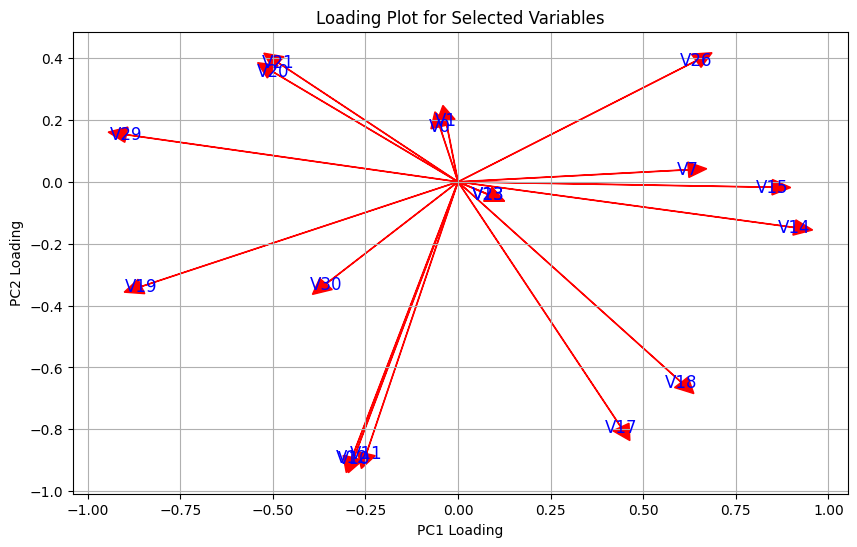

In [ ]:
# Abbreviate variable names
abbreviated_names = ['V' + str(i) for i in variables_to_plot]

# Plot loading plot for selected variables with abbreviated names
plt.figure(figsize=(10, 6))
for i, name in zip(variables_to_plot, abbreviated_names):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], head_width=0.05, head_length=0.05, color='r')
    plt.text(loadings[i, 0], loadings[i, 1], name, color='b', fontsize=12, ha='center', va='center')

plt.xlabel('PC1 Loading')
plt.ylabel('PC2 Loading')
plt.title('Loading Plot for Selected Variables')
plt.grid(True)
plt.show()


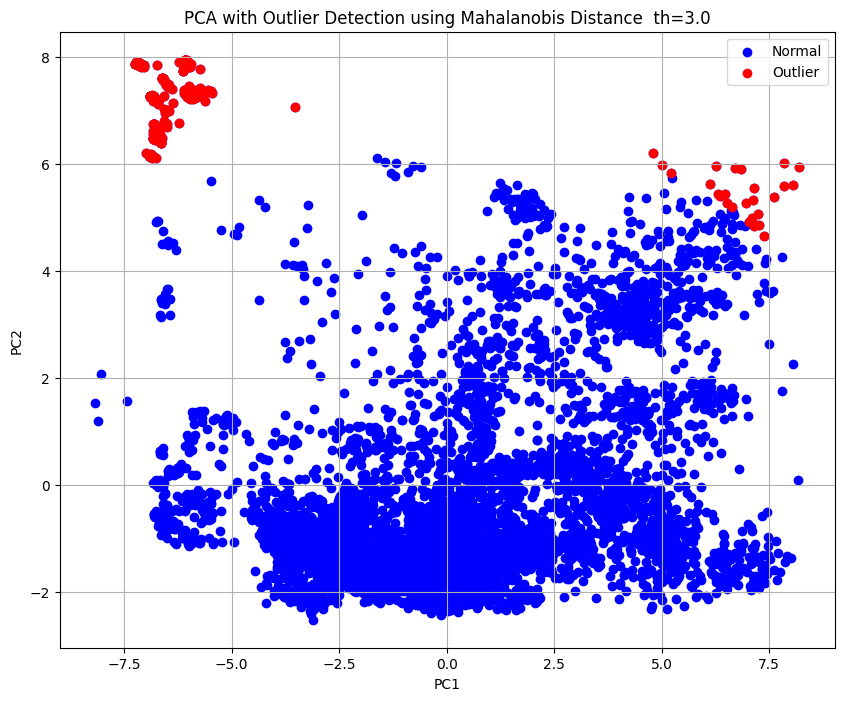

In [ ]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt
#Calculate Mahalanobis distance
def mahalanobis_distance(x, mean, cov):
    x_minus_mean = x - mean
    inv_cov = np.linalg.inv(cov)
    distance = np.sqrt(np.dot(np.dot(x_minus_mean, inv_cov), x_minus_mean.T))
    return distance

# Calculate mean and covariance matrix of principal components
pc_mean = pc_df[['PC1', 'PC2']].mean().values
pc_cov = pc_df[['PC1', 'PC2']].cov().values

# Calculate Mahalanobis distances for each point
pc_df['Mahalanobis'] = pc_df[['PC1', 'PC2']].apply(
    lambda x: mahalanobis_distance(x, pc_mean, pc_cov), axis=1)

# Set a threshold for Mahalanobis distance
threshold = 3.0  # You can adjust this threshold

# Identify outliers
outliers = pc_df[pc_df['Mahalanobis'] > threshold]

# Plot PCA with outliers highlighted
plt.figure(figsize=(10, 8))
plt.scatter(pc_df['PC1'], pc_df['PC2'], c='b', label='Normal')
plt.scatter(outliers['PC1'], outliers['PC2'], c='r', label='Outlier')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with Outlier Detection using Mahalanobis Distance  th=3.0')
plt.legend()
plt.grid(True)
plt.show()

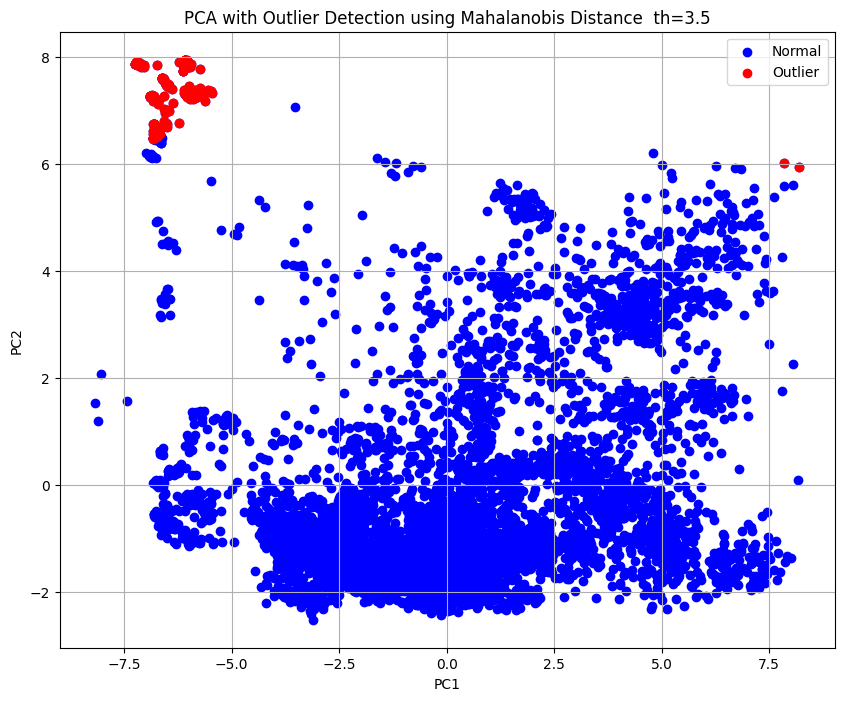

In [ ]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt
#Calculate Mahalanobis distance
def mahalanobis_distance(x, mean, cov):
    x_minus_mean = x - mean
    inv_cov = np.linalg.inv(cov)
    distance = np.sqrt(np.dot(np.dot(x_minus_mean, inv_cov), x_minus_mean.T))
    return distance

# Calculate mean and covariance matrix of principal components
pc_mean = pc_df[['PC1', 'PC2']].mean().values
pc_cov = pc_df[['PC1', 'PC2']].cov().values

# Calculate Mahalanobis distances for each point
pc_df['Mahalanobis'] = pc_df[['PC1', 'PC2']].apply(
    lambda x: mahalanobis_distance(x, pc_mean, pc_cov), axis=1)

# Set a threshold for Mahalanobis distance
threshold = 3.5  # You can adjust this threshold

# Identify outliers
outliers = pc_df[pc_df['Mahalanobis'] > threshold]

# Plot PCA with outliers highlighted
plt.figure(figsize=(10, 8))
plt.scatter(pc_df['PC1'], pc_df['PC2'], c='b', label='Normal')
plt.scatter(outliers['PC1'], outliers['PC2'], c='r', label='Outlier')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with Outlier Detection using Mahalanobis Distance  th=3.5')
plt.legend()
plt.grid(True)
plt.show()

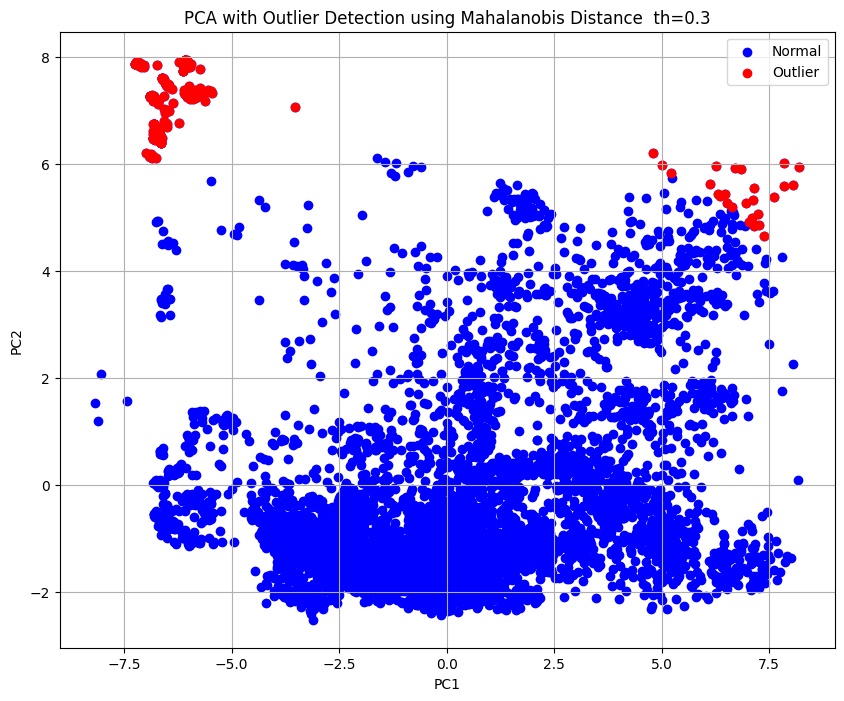

Indices of outliers: Int64Index([ 531,  534,  546,  549,  562,  564,  568,  573,  582,  584,
            ...
            5965, 5966, 5978, 5993, 6003, 6017, 6022, 6037, 6044, 6047],
           dtype='int64', length=258)


In [15]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt

# Assume pc_df is your DataFrame containing principal component values
# Calculate Mahalanobis distance
def mahalanobis_distance(x, mean, cov):
    x_minus_mean = x - mean
    inv_cov = np.linalg.inv(cov)
    distance = np.sqrt(np.dot(np.dot(x_minus_mean, inv_cov), x_minus_mean.T))
    return distance

# Calculate mean and covariance matrix of principal components
pc_mean = pc_df[['PC1', 'PC2']].mean().values
pc_cov = pc_df[['PC1', 'PC2']].cov().values

# Calculate Mahalanobis distances for each point
pc_df['Mahalanobis'] = pc_df[['PC1', 'PC2']].apply(
    lambda x: mahalanobis_distance(x, pc_mean, pc_cov), axis=1)

# Set a threshold for Mahalanobis distance
threshold = 3.0  # You can adjust this threshold

# Identify outliers
outliers = pc_df[pc_df['Mahalanobis'] > threshold]

# Retrieve indices of outliers
outlier_indices = outliers.index

# Plot PCA with outliers highlighted
plt.figure(figsize=(10, 8))
plt.scatter(pc_df['PC1'], pc_df['PC2'], c='b', label='Normal')
plt.scatter(outliers['PC1'], outliers['PC2'], c='r', label='Outlier')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with Outlier Detection using Mahalanobis Distance  th=0.3')
plt.legend()
plt.grid(True)
plt.show()

print("Indices of outliers:", outlier_indices)


In [16]:
outlier_data = pc_df.iloc[outlier_indices]

# Print the outlier data
print("Outlier data:")
print(outlier_data)

Outlier data:
           PC1       PC2  activity_encoded  Mahalanobis
531   5.211130  5.828318                 1     3.001272
534   7.382494  4.653330                 1     3.005910
546   7.146638  4.841591                 1     3.013215
549   7.126407  5.328359                 1     3.164824
562   4.808915  6.210204                 1     3.089387
...        ...       ...               ...          ...
6017 -6.088814  7.928724                 2     3.937311
6022 -6.062821  7.848862                 2     3.902504
6037 -6.075564  7.879184                 2     3.916112
6044 -6.047495  7.933112                 2     3.933388
6047 -6.090308  7.907567                 2     3.929237

[258 rows x 4 columns]


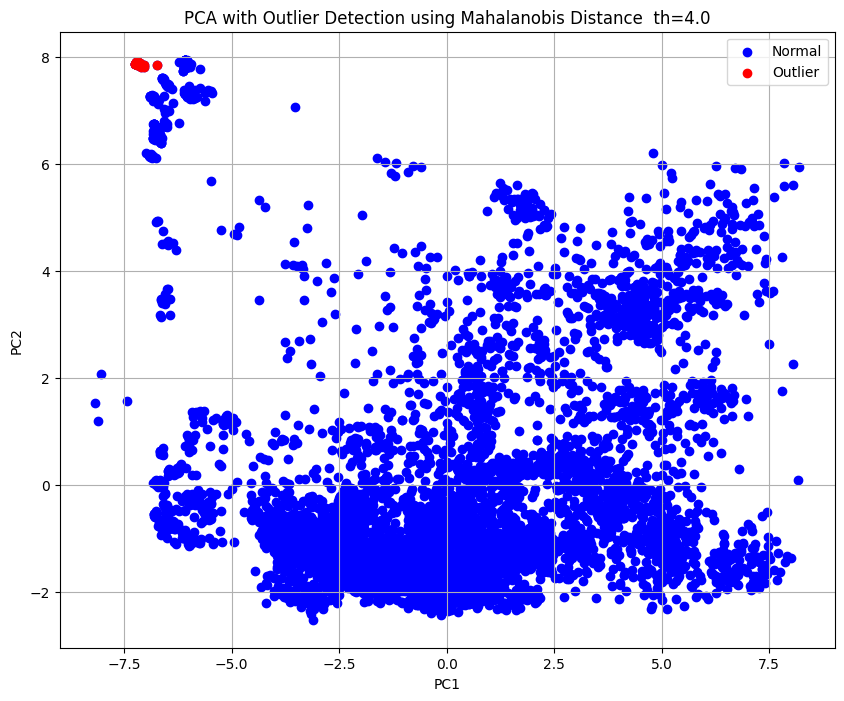

In [17]:
# Calculate mean and covariance matrix of principal components
pc_mean = pc_df[['PC1', 'PC2']].mean().values
pc_cov = pc_df[['PC1', 'PC2']].cov().values

# Calculate Mahalanobis distances for each point
pc_df['Mahalanobis'] = pc_df[['PC1', 'PC2']].apply(
    lambda x: mahalanobis_distance(x, pc_mean, pc_cov), axis=1)

# Set a threshold for Mahalanobis distance
threshold = 4.0  # You can adjust this threshold

# Identify outliers
outliers = pc_df[pc_df['Mahalanobis'] > threshold]

# Plot PCA with outliers highlighted
plt.figure(figsize=(10, 8))
plt.scatter(pc_df['PC1'], pc_df['PC2'], c='b', label='Normal')
plt.scatter(outliers['PC1'], outliers['PC2'], c='r', label='Outlier')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with Outlier Detection using Mahalanobis Distance  th=4.0')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
cleaned_pc_df = pc_df.drop(outlier_indices)

# Now `cleaned_pc_df` contains the dataset with outliers removed

# Print the shape of the cleaned dataset to verify
print("Shape of cleaned dataset:", cleaned_pc_df.shape)

Shape of cleaned dataset: (6052, 4)


In [ ]:
cleaned_pc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6052 entries, 0 to 6309
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PC1               6052 non-null   float64
 1   PC2               6052 non-null   float64
 2   activity_encoded  6052 non-null   int64  
 3   Mahalanobis       6052 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 236.4 KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming `cleaned_pc_df` contains your cleaned dataset with features and target variable

# Split dataset into features (X) and target variable (y)
X = cleaned_pc_df.drop(columns=['activity_encoded'])
y = cleaned_pc_df['activity_encoded']




In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7398843930635838


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same 

<Figure size 800x600 with 0 Axes>

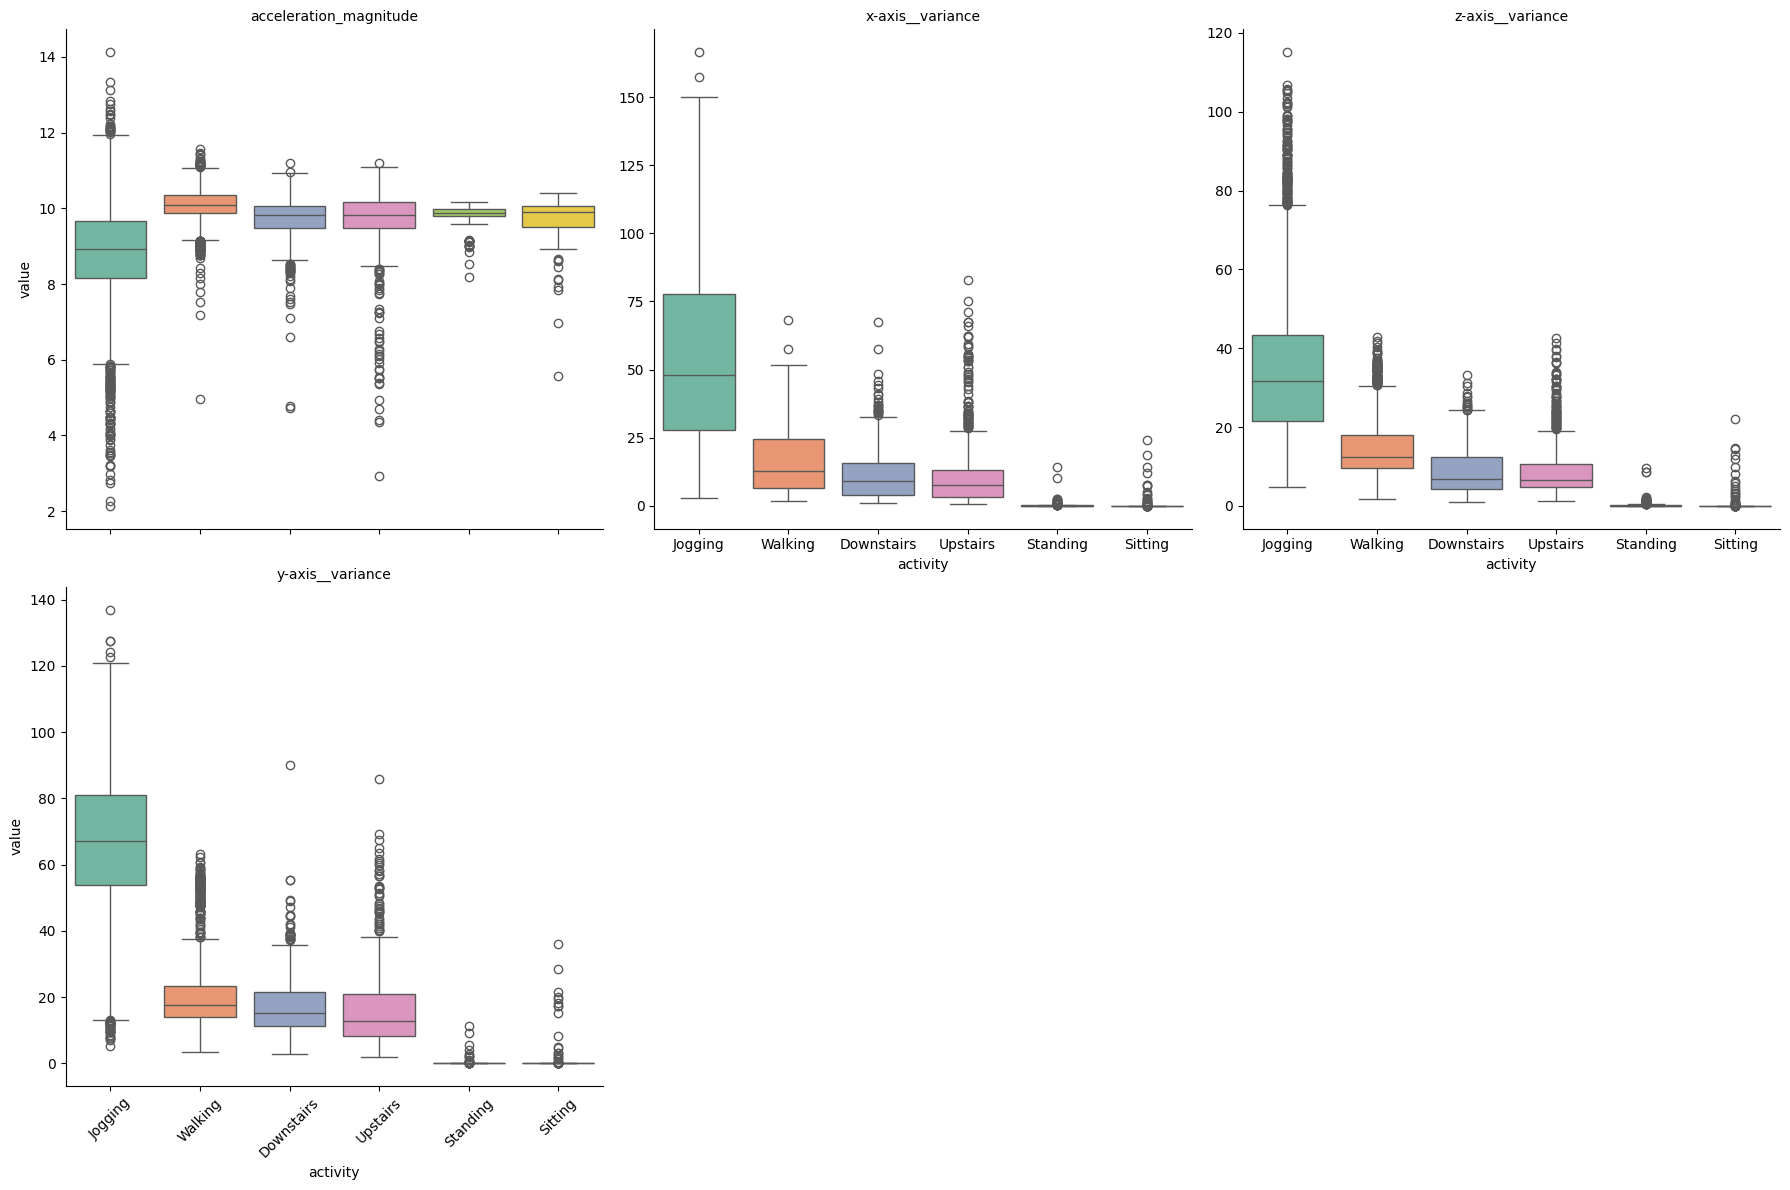

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Calculate acceleration magnitude
df_metadata['acceleration_magnitude'] = np.sqrt(df_metadata['x-axis__mean']**2 +
                                                df_metadata['y-axis__mean']**2 +
                                                df_metadata['z-axis__mean']**2)

# Define the variables to be used
variables = ['acceleration_magnitude', 'x-axis__variance', 'z-axis__variance', 'y-axis__variance', 'z-axis__variance']

# Define a color palette for activities
activity_palette = sns.color_palette("Set2", n_colors=len(df_metadata['activity'].unique()))

# Melt the dataframe for plotting
df_melted = pd.melt(df_metadata, id_vars=['activity'], value_vars=variables)

# Create grid plot
plt.figure(figsize=(8, 6))
g = sns.FacetGrid(df_melted, col='variable', col_wrap=3, height=6, sharey=False)
g.map(sns.boxplot, 'activity', 'value', palette=activity_palette)
g.set_titles('{col_name}')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('box_plots_grid.png')

# Show the plot
plt.show()



/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


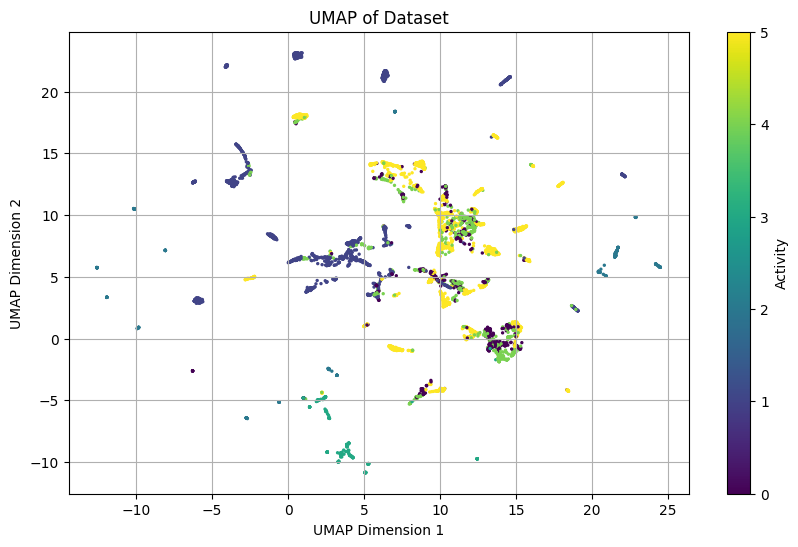

In [20]:
import umap
# Separate numerical columns for UMAP
numerical_columns = df_metadata.select_dtypes(include=['float64'])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_columns)

# Apply UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(scaled_features)

# Plot UMAP
plt.figure(figsize=(10, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=df_metadata['activity_encoded'], cmap='viridis', s=2)
plt.title('UMAP of Dataset')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.colorbar(label='Activity')
plt.grid()
plt.show()

In [48]:
# Encode activity column
label_encoder = LabelEncoder()
df_metadata['activity_encoded'] = label_encoder.fit_transform(df_metadata['activity'])
df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6310 entries, 0 to 6309
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_snippet                6310 non-null   object 
 1   x-axis__sum_values          6310 non-null   float64
 2   x-axis__median              6310 non-null   float64
 3   x-axis__mean                6310 non-null   float64
 4   x-axis__length              6310 non-null   float64
 5   x-axis__standard_deviation  6310 non-null   float64
 6   x-axis__variance            6310 non-null   float64
 7   x-axis__root_mean_square    6310 non-null   float64
 8   x-axis__maximum             6310 non-null   float64
 9   x-axis__absolute_maximum    6310 non-null   float64
 10  x-axis__minimum             6310 non-null   float64
 11  y-axis__sum_values          6310 non-null   float64
 12  y-axis__median              6310 non-null   float64
 13  y-axis__mean                6310 

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


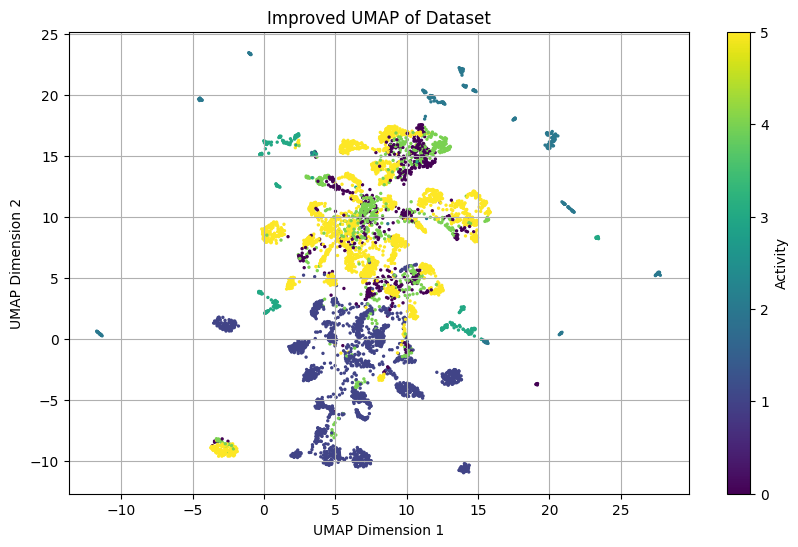

In [53]:
# Apply UMAP with adjusted parameters
reducer = umap.UMAP(n_neighbors=20, min_dist=0.3, metric='euclidean', random_state=42)
embedding = reducer.fit_transform(scaled_features)

# Plot UMAP with improved clustering
plt.figure(figsize=(10, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=df_metadata['activity_encoded'], cmap='viridis', s=2)
plt.title('Improved UMAP of Dataset')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.colorbar(label='Activity')
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
<ipython-input-55-46b300b38ca1>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[indices, 0], embedding[indices, 1], label=activity, cmap='viridis', s=2)


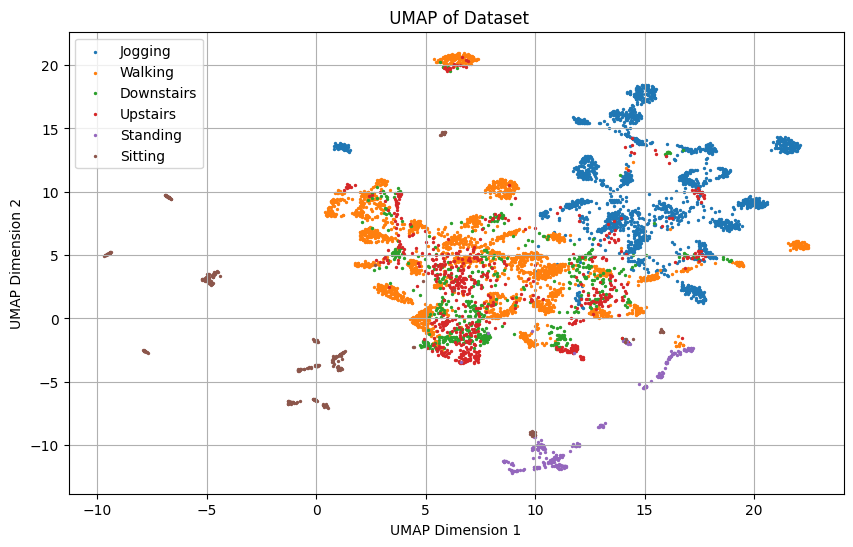

In [55]:
# Apply UMAP with adjusted parameters
reducer = umap.UMAP(n_neighbors=40, min_dist=0.5, metric='euclidean', random_state=42)
embedding = reducer.fit_transform(scaled_features)

# Create a color dictionary for activities
activity_color_dict = {activity: i for i, activity in enumerate(df_metadata['activity'].unique())}

# Plot UMAP with improved clustering
plt.figure(figsize=(10, 6))
for activity, color_index in activity_color_dict.items():
    indices = df_metadata['activity'] == activity
    plt.scatter(embedding[indices, 0], embedding[indices, 1], label=activity, cmap='viridis', s=2)

plt.title(' UMAP of Dataset')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend()
plt.grid()
plt.show()


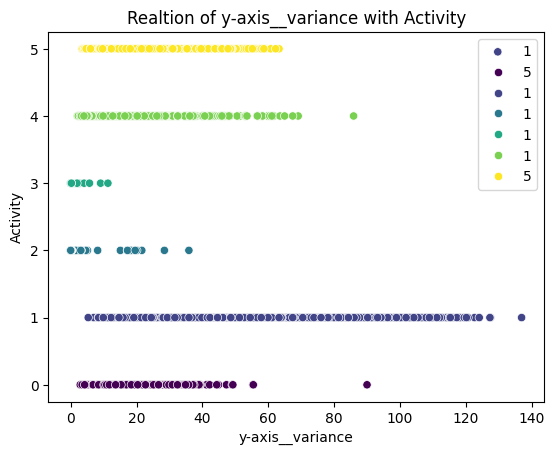

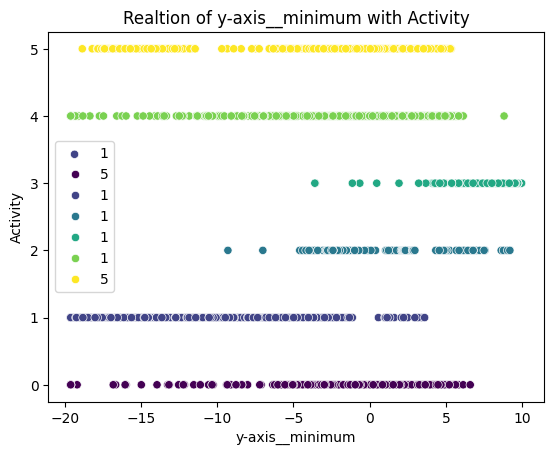

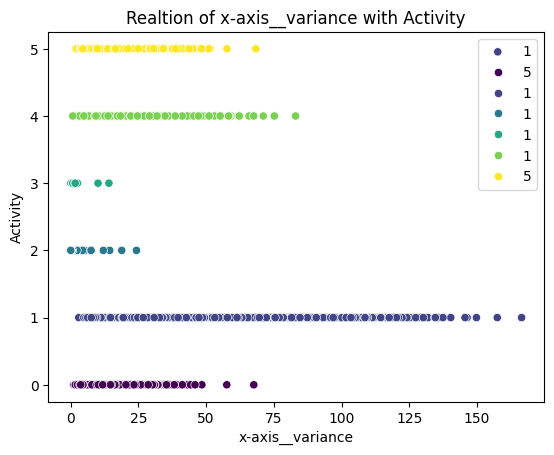

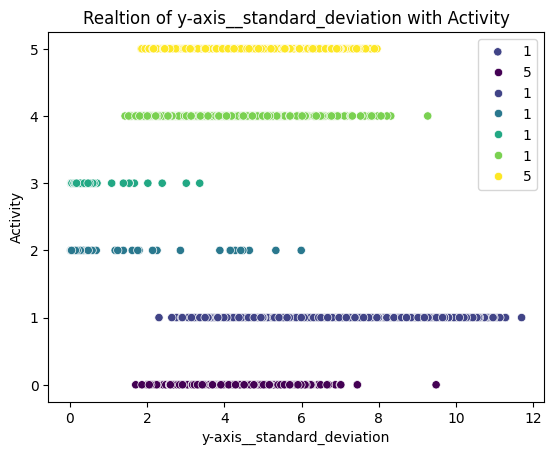

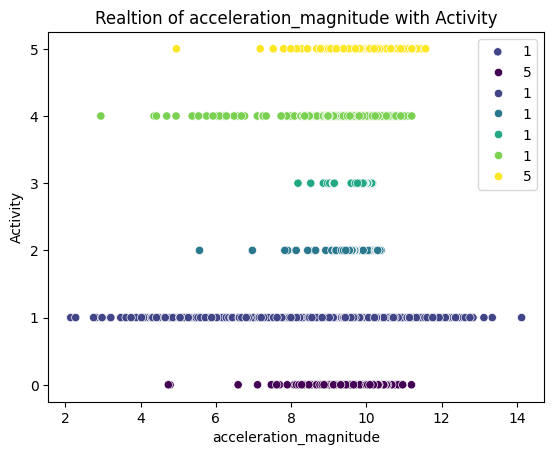

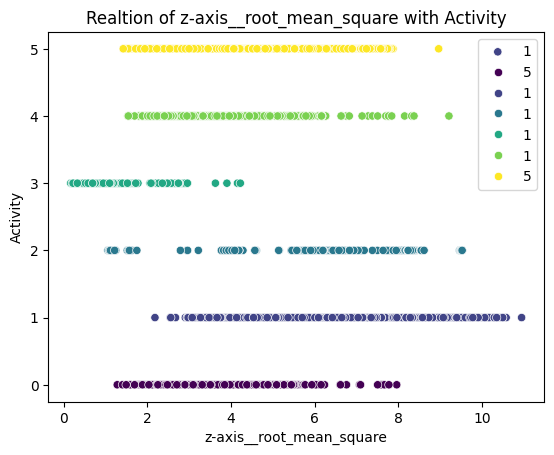

In [ ]:
top_n = 6  # You can adjust this number based on your preference
top_correlated_variables = correlations.iloc[1:top_n+1].index.tolist()  # Exclude 'activity_encoded' itself

# Reverse label encoding for the legend
label_encoder = LabelEncoder()
df_metadata['activity'] = label_encoder.fit_transform(df_metadata['activity'])
activity_labels = label_encoder.inverse_transform(df_metadata['activity'])

# Visualize relationships using scatter plots
for var in top_correlated_variables:
    sns.scatterplot(x=var, y='activity', data=df_metadata, hue='activity', palette='viridis')
    plt.title(f'Realtion of {var} with Activity')
    plt.xlabel(var)
    plt.ylabel('Activity')
    plt.legend(labels=activity_labels)
    plt.show()